In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# better plots
sns.set(rc={'figure.figsize':(12,8)});

In [4]:
directory = os.path.dirname(os.getcwd())
directory

'd:\\github\\AssignmentEconometricsIV'

In [5]:
# read the data
input_path = f'{directory}\\data\\stacionarized_cpi.csv'
df = pd.read_csv(input_path)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [6]:
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,...,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
date,,,,,,,,,,,,,,,,,,,,,
1959-03-01,0.643011,0.735934,0.941009,0.832120,1.430253,0.603609,0.489927,0.000000,1.939697,-0.474508,...,0.000000,0.000000,-0.024978,0.066630,-0.112407,0.026180,-0.002184,-0.814665,0.481883,-1.479236
1959-04-01,0.649412,0.704864,-0.363947,0.061571,2.107741,1.433803,1.454234,1.565338,0.637947,1.651147,...,0.000000,0.000000,0.130473,-0.022927,0.134899,0.175237,-0.002163,1.220345,-0.488953,2.492924
1959-05-01,0.576311,0.661646,1.200535,0.780340,1.495024,0.826920,0.958304,0.476849,2.015117,0.000000,...,0.000000,0.000000,-0.143071,0.064631,-0.168653,-0.193673,-0.002143,-0.408972,-0.481929,-1.534223
1959-06-01,0.310244,0.297379,0.370829,0.906434,0.114438,0.703445,0.712642,-0.476849,0.745195,-0.704372,...,0.325204,0.337268,0.229263,0.032895,0.331580,0.209340,-0.461895,0.399176,0.479617,-1.225183
1959-07-01,-0.058921,-0.076384,-0.342687,-0.033018,-2.423797,0.116693,0.824692,1.305596,1.961284,0.821073,...,-0.001054,-0.001134,-0.074908,-0.152071,-0.123781,-0.010035,0.000000,-0.404015,-0.479617,2.934128


In [7]:
# set the amount of lags
lags = 2

In [8]:
# create lagged variables
for col in df.columns:
    for i in range(lags):
        name_col = col + f"(-{i+1})"
        df[name_col] = df[col].shift(i+1)

In [9]:
# inflation rate ahead
df['CPIAUCSL(+1)'] = df['CPIAUCSL'].shift(-1)

In [10]:
# drop nan rows
df = df.dropna()

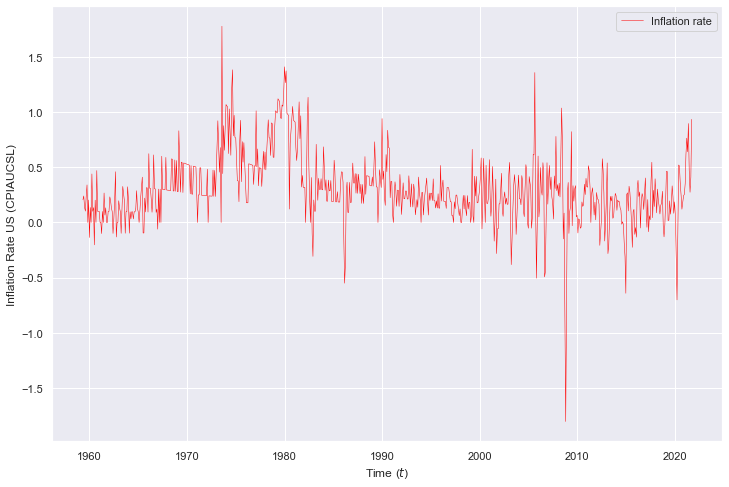

In [11]:
# plot Inflation rate of US
plt.plot(df['CPIAUCSL'], color='red', label='Inflation rate', linewidth = 0.5)

plt.xlabel(f'Time ($t$)')
plt.ylabel('Inflation Rate US (CPIAUCSL)')
plt.legend()
plt.show()

In [12]:
import glmnet_python.glmnet_python
from cvglmnet import cvglmnet
from cvglmnetPredict import cvglmnetPredict
from cvglmnetPlot import cvglmnetPlot
from cvglmnetCoef import cvglmnetCoef

from functions.linear_models import Ridge, LASSO

In [14]:
df

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,...,DSERRG3M086SBEA(-2),CES0600000008(-1),CES0600000008(-2),CES2000000008(-1),CES2000000008(-2),CES3000000008(-1),CES3000000008(-2),INVEST(-1),INVEST(-2),CPIAUCSL(+1)
date,,,,,,,,,,,,,,,,,,,,,
1959-05-01,0.576311,0.661646,1.200535,0.780340,1.495024,0.826920,0.958304,0.476849,2.015117,0.000000,...,0.026180,-0.002163,-0.002184,1.220345,-0.814665,-0.488953,0.481883,2.492924,-1.479236,0.240467
1959-06-01,0.310244,0.297379,0.370829,0.906434,0.114438,0.703445,0.712642,-0.476849,0.745195,-0.704372,...,0.175237,-0.002143,-0.002163,-0.408972,1.220345,-0.481929,-0.488953,-1.534223,2.492924,0.137221
1959-07-01,-0.058921,-0.076384,-0.342687,-0.033018,-2.423797,0.116693,0.824692,1.305596,1.961284,0.821073,...,-0.193673,-0.461895,-0.002143,0.399176,-0.408972,0.479617,-0.481929,-1.225183,-1.534223,0.102810
1959-08-01,-0.563656,-0.574751,0.600333,0.636421,-3.446532,-0.702622,-0.234750,0.117877,-2.831305,1.161607,...,0.209340,0.000000,-0.461895,-0.404015,0.399176,-0.479617,0.479617,2.934128,-1.225183,0.239316
1959-09-01,0.072136,0.000000,1.001845,-1.315700,-0.120914,-0.470898,-0.353804,-0.353743,-3.041963,0.575782,...,-0.010035,0.000000,0.000000,0.394453,-0.404015,-0.961546,-0.479617,-2.549545,2.934128,0.340716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,-0.268168,0.246839,0.588917,0.848804,0.546727,0.002528,0.114008,-0.202956,-1.515281,0.156910,...,-0.064121,-0.232967,0.072119,-0.802651,0.560450,0.209887,0.298788,0.058641,-0.293195,0.471599
2021-07-01,0.803329,0.376098,-0.313442,-1.637075,0.767226,1.461057,1.668025,0.970731,4.626890,-0.042815,...,-0.067356,0.110918,-0.232967,0.129753,-0.802651,-0.004596,0.209887,-0.716631,0.058641,0.273614
2021-08-01,-0.041013,-0.094940,0.727968,1.152697,-0.136496,-0.232743,-0.485054,-0.407293,-1.633303,-0.062902,...,0.065611,-0.116327,0.110918,-0.198770,0.129753,-0.046350,-0.004596,-0.488861,-0.716631,0.410742


In [13]:
# set variables
y = df["CPIAUCSL(+1)"]
X = df.drop("CPIAUCSL(+1)", axis=1)

In [15]:
# add forecast columns
df["CPIAUCSL_estimated_Ridge"] = np.nan
df["CPIAUCSL_estimated_LASSO"] = np.nan

In [16]:
# set some parameters
rolling_window = 492 - lags
T = len(y) - rolling_window

In [18]:
# list of forecast squared errors
errors_Ridge = []
errors_LASSO = []

for t in tqdm(range(T), desc='Processing for time'):
    # predict date
    date = y[[rolling_window+t]].index

    # estimation sets
    X_train = X[t:(rolling_window+t)]
    y_train = y[t:(rolling_window+t)]

    # forecast sets
    X_test = X.iloc[[rolling_window+t]]
    y_test = y[rolling_window+t]

    # estimations
    y_pred_Ridge, error_pred_Rigde = Ridge(X_train, y_train, X_test, y_test)
    y_pred_LASSO, error_pred_LASSO = LASSO(X_train, y_train, X_test, y_test)

    # fill forecast columns
    df["CPIAUCSL_estimated_Ridge"][date] = y_pred_Ridge
    df["CPIAUCSL_estimated_LASSO"][date] = y_pred_LASSO

    # append forecast squared errors
    errors_Ridge.append(error_pred_Rigde)
    errors_LASSO.append(error_pred_LASSO)

Processing for time: 100%|██████████| 260/260 [1:16:49<00:00, 17.73s/it]


In [19]:
df[["CPIAUCSL(+1)", "CPIAUCSL_estimated_Ridge", "CPIAUCSL_estimated_LASSO"]][rolling_window:]

,CPIAUCSL(+1),CPIAUCSL_estimated_Ridge,CPIAUCSL_estimated_LASSO
date,,,
2000-03-01,-0.058514,0.393368,0.466194
2000-04-01,0.175234,0.014538,0.052259
2000-05-01,0.580720,0.225068,0.174537
2000-06-01,0.289519,0.386693,0.376834
2000-07-01,0.000000,0.245021,0.267478
...,...,...,...
2021-06-01,0.471599,0.262729,0.475050
2021-07-01,0.273614,0.089747,0.237356
2021-08-01,0.410742,0.155319,0.210566


In [20]:
# prediction dates
prediction_dates = list(X.iloc[(rolling_window):].index)

In [21]:
# treat the error list
errors_Ridge_ = [item[0] for item in errors_Ridge]
errors_LASSO_ = [item[0] for item in errors_LASSO]

# compute cumulated mse
cum_errors_Ridge = list(np.cumsum(errors_Ridge_))
cum_errors_LASSO = list(np.cumsum(errors_LASSO_))

In [23]:
errors = {'Cumulated_MSE_Ridge': cum_errors_Ridge, 'Cumulated_MSE_LASSO': cum_errors_LASSO}
mse = pd.DataFrame(errors, index=prediction_dates)

In [24]:
mse

,Cumulated_MSE_Ridge,Cumulated_MSE_LASSO
2000-03-01,0.204197,0.275318
2000-04-01,0.230021,0.290441
2000-05-01,0.356509,0.455426
2000-06-01,0.365951,0.463050
2000-07-01,0.425987,0.534595
...,...,...
2021-06-01,22.837369,17.672505
2021-07-01,22.871176,17.673819
2021-08-01,22.936417,17.713890
2021-09-01,23.423086,18.084997


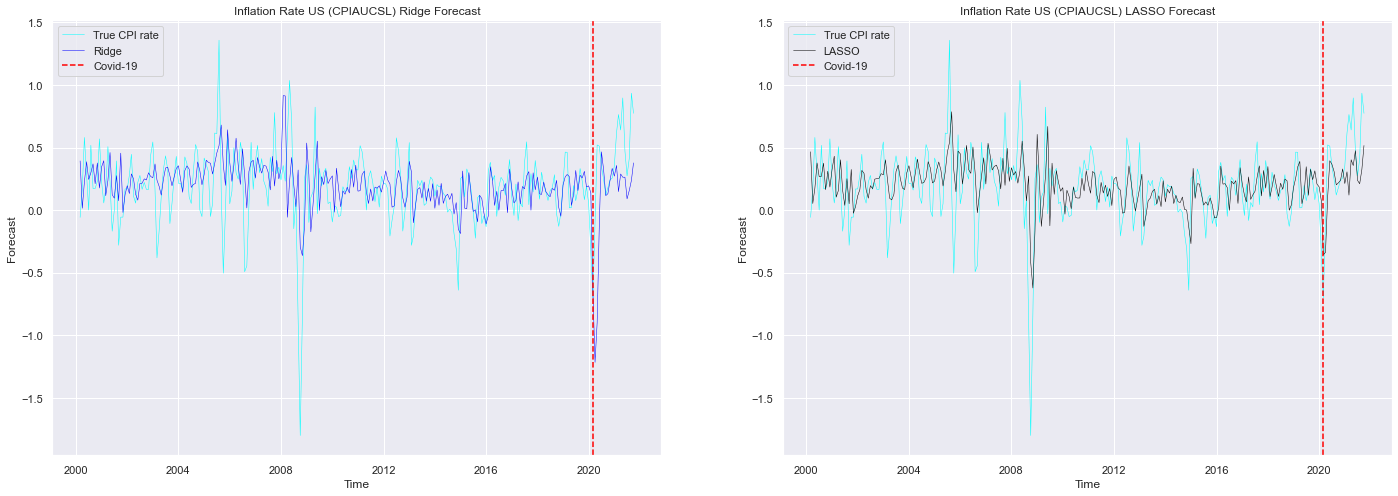

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# True CPI
axes[0].plot(df['CPIAUCSL(+1)'][rolling_window:], color='cyan', label='True CPI rate', linewidth=0.5)
# Ridge forecasts
axes[0].plot(df["CPIAUCSL_estimated_Ridge"], color='blue', label='Ridge', linewidth=0.5)
# adding a vertical line at 2020, January
axes[0].axvline(x=mse.index[240], color='red', linestyle='--', label='Covid-19')
# labels
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Forecast')
axes[0].set_title('Inflation Rate US (CPIAUCSL) Ridge Forecast')
axes[0].legend()

# True CPI
axes[1].plot(df['CPIAUCSL(+1)'][rolling_window:], color='cyan', label='True CPI rate', linewidth=0.5)
# LASSO forecasts
axes[1].plot(df["CPIAUCSL_estimated_LASSO"], color='black', label='LASSO', linewidth=0.5)
# adding a vertical line at 2020, January
axes[1].axvline(x=mse.index[240], color='red', linestyle='--', label='Covid-19')
# labels
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Forecast')
axes[1].set_title('Inflation Rate US (CPIAUCSL) LASSO Forecast')
axes[1].legend()

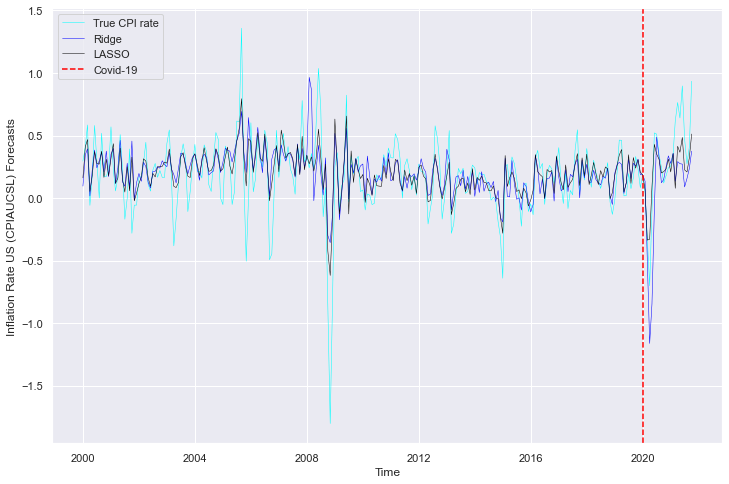

In [36]:
plt.plot(df['CPIAUCSL'][rolling_window:], color='cyan', label='True CPI rate', linewidth = 0.5)

plt.plot(df["CPIAUCSL_estimated_Ridge"], color='blue', label='Ridge', linewidth = 0.5)

plt.plot(df["CPIAUCSL_estimated_LASSO"], color='black', label='LASSO', linewidth = 0.5)

# adding a vertical line at 2020, January
plt.axvline(x=mse.index[240], color='red', linestyle='--', label='Covid-19')

plt.xlabel('Time')
plt.ylabel('Inflation Rate US (CPIAUCSL) Forecasts')
plt.legend()
plt.show()

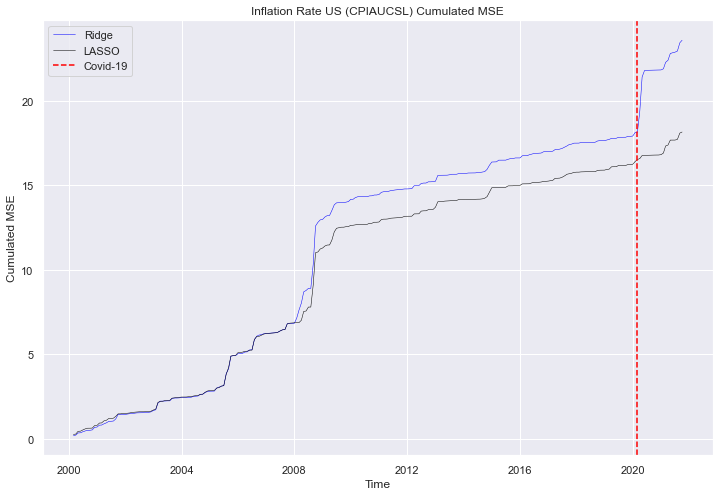

In [26]:
# plot of cumulated MSE
plt.plot(mse["Cumulated_MSE_Ridge"], color='blue', label="Ridge", linewidth = 0.5)

# plot of cumulated MSE
plt.plot(mse["Cumulated_MSE_LASSO"], color='black', label="LASSO", linewidth = 0.5)

# adding a vertical line at 2020, January
plt.axvline(x=mse.index[240], color='red', linestyle='--', label='Covid-19')

plt.xlabel('Time')
plt.ylabel('Cumulated MSE')
plt.title('Inflation Rate US (CPIAUCSL) Cumulated MSE')
plt.legend()
plt.show()